In [1]:
from qiskit import IBMQ, QuantumCircuit, Aer
from qiskit.utils import QuantumInstance
from main_v2 import *

In [14]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-csic', group='internal', project='iff-csic')
backend  = provider.get_backend('ibm_lagos')
noise_model = NoiseModel.from_backend(backend)
# noise_model = decoherence_noise(T1=5e3, T2=200e3)
# quantum_instance = QuantumInstance( Aer.get_backend('aer_simulator'), shots=2**13, noise_model=noise_model )
quantum_instance = QuantumInstance( backend, shots=2**13 )

ibmqfactory.load_account:WARNING:2021-11-07 03:07:41,730: Credentials are already in use. The existing account in the session will be replaced.
Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.067017 > 1.066667). Truncating to maximum value.
Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.067059 > 1.066667). Truncating to maximum value.


In [3]:
n = 1
p = 3

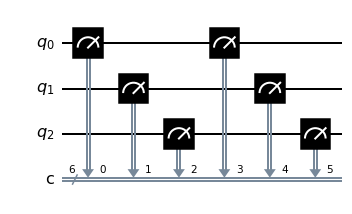

In [4]:
mpt = measurement_process_tomography( n, p)
circuits = mpt.circuits()
circuits[0].draw(output='mpl')

In [5]:
results = quantum_instance.execute(circuits)

In [6]:
operators = mpt.fit( results, circuits )

In [7]:
operators

[[array([[ 9.90791502e-01+0.00000000e+00j, -3.54813749e-04-5.05591006e-04j, -3.54813749e-04+5.05591006e-04j,  5.67839922e-06+0.00000000e+00j],
         [ 4.52576708e-03-4.31630191e-03j,  1.27247135e-03+4.57918598e-03j, -3.63081427e-05+1.38690156e-04j,  3.77247293e-05-9.91208828e-05j],
         [ 4.52576708e-03+4.31630191e-03j, -3.63081427e-05-1.38690156e-04j,  1.27247135e-03-4.57918598e-03j,  3.77247293e-05+9.91208828e-05j],
         [ 4.80685983e-03+0.00000000e+00j,  1.30721737e-04+2.81890344e-04j,  1.30721737e-04-2.81890344e-04j,  1.04548884e-02+0.00000000e+00j]]),
  array([[ 4.39555749e-03+0.00000000e+00j, -5.43710037e-04+4.20368477e-04j, -5.43710037e-04-4.20368477e-04j,  9.75055439e-03+0.00000000e+00j],
         [-2.57331464e-06-5.88803786e-05j,  3.26747726e-03-1.65730330e-03j, -1.91944552e-04+1.29263537e-04j,  1.23182439e-04-1.40989737e-03j],
         [-2.57331464e-06+5.88803786e-05j, -1.91944552e-04-1.29263537e-04j,  3.26747726e-03+1.65730330e-03j,  1.23182439e-04+1.40989737e-03j

In [8]:
counts = []
for qc in circuits:
    counts.append(  dict2array(  results.get_counts(qc), 6 )  )
counts_1 = np.array( counts )

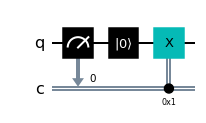

In [9]:
qc = QuantumCircuit(1,1)
qc.measure(0,0)
qc.reset(0)
qc.draw(output='mpl')
qc.x(0).c_if(qc.cregs[0],1)
qc.draw(output='mpl')

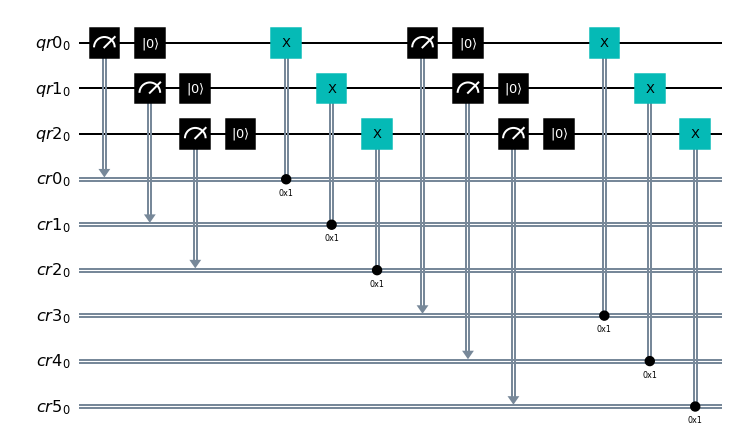

In [15]:
mpt_2 = measurement_process_tomography( n, p )
circuits_2 = mpt_2.circuits(qc)
circuits_2[0].draw(output='mpl',cregbundle=False)

In [ ]:
results_2 = quantum_instance.execute(circuits_2)

C:\Users\lucia\miniconda3\lib\site-packages\qiskit\utils\run_circuits.py:695: UserWarning: max_credits is not a recognized runtime option and may be ignored by the backend.
  return backend.run(circuits, **run_kwargs)
FAILURE: Job id: 618734f831485d33a8d2190e encounters the error. Error is : Instruction bfunc is not supported. Error code: 7001.. Re-submit the circuits.


In [ ]:
operators_2 = mpt.fit( results_2, circuits_2 )

In [ ]:
operators_2